### Placement Assignment Machine Learning

#### Q-9. A cyber security agent wants to check the Microsoft Malware so need he came to you as a Machine learning Engineering with Data, You need to find the Malware using a supervised algorithm and you need to find the accuracy of the model.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("train_malware.csv")
data.head(2)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0


In [4]:
data.shape

(8921483, 83)

In [54]:
data = data[0:90000]

In [55]:
data.shape

(90000, 74)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 74 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  90000 non-null  object 
 1   ProductName                                        90000 non-null  object 
 2   EngineVersion                                      90000 non-null  object 
 3   AppVersion                                         90000 non-null  object 
 4   AvSigVersion                                       90000 non-null  object 
 5   IsBeta                                             90000 non-null  int64  
 6   RtpStateBitfield                                   89689 non-null  float64
 7   IsSxsPassiveMode                                   90000 non-null  int64  
 8   AVProductStatesIdentifier                          89657 non-null  float64
 9   AVProd

In [57]:
data.isnull().sum()

MachineIdentifier                             0
ProductName                                   0
EngineVersion                                 0
AppVersion                                    0
AvSigVersion                                  0
                                           ... 
Census_IsPenCapable                           0
Census_IsAlwaysOnAlwaysConnectedCapable     779
Wdft_IsGamer                               3073
Wdft_RegionIdentifier                      3073
HasDetections                                 0
Length: 74, dtype: int64

In [112]:
i=0
for col in data.columns:
    if (data[col].isnull().sum()/len(data[col])*100) >=10:
        print("Dropping column", col)
        data.drop(labels=col,axis=1,inplace=True)
        i=i+1
        
print("Total number of columns dropped in dataframe", i)

Total number of columns dropped in dataframe 0


In [59]:
data.isnull().sum()

MachineIdentifier                             0
ProductName                                   0
EngineVersion                                 0
AppVersion                                    0
AvSigVersion                                  0
                                           ... 
Census_IsPenCapable                           0
Census_IsAlwaysOnAlwaysConnectedCapable     779
Wdft_IsGamer                               3073
Wdft_RegionIdentifier                      3073
HasDetections                                 0
Length: 74, dtype: int64

In [113]:
df_without_na = data.dropna()                     

In [114]:
df_without_na = df_without_na.drop_duplicates()

In [115]:
df_without_na.shape

(72506, 74)

In [170]:
df = df_without_na.copy()

In [171]:
good_cols = list(df.columns)
for col in df.columns:
    rate = df[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.7:
        good_cols.remove(col)
train = df[good_cols]

In [172]:
pd.set_option('display.max_columns', None)
train

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,53447.0,1.0,29,128035.0,35.0,171,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,Desktop,2668.0,9124.0,4.0,2341.0,476940.0,HDD,299451.0,4096.0,Desktop,18.9,1440.0,900.0,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,Retail,628.0,36144.0,0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,53447.0,1.0,93,1482.0,119.0,64,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,Notebook,2668.0,91656.0,4.0,2405.0,476940.0,HDD,102385.0,4096.0,Notebook,13.9,1366.0,768.0,1.000000e+00,10.0.17134.1,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,Retail,628.0,57858.0,0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,53447.0,1.0,86,153579.0,64.0,49,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,Desktop,4909.0,317701.0,4.0,1972.0,114473.0,SSD,113907.0,4096.0,Desktop,21.5,1920.0,1080.0,4.294967e+09,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,OEM:NONSLP,142.0,52682.0,0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,53447.0,1.0,88,20710.0,117.0,115,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,Desktop,1443.0,275890.0,4.0,2273.0,238475.0,UNKNOWN,227116.0,4096.0,MiniTower,18.5,1366.0,768.0,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,OEM:NONSLP,355.0,20050.0,0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,53447.0,1.0,18,37376.0,277.0,75,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,Notebook,1443.0,331929.0,4.0,2500.0,476940.0,HDD,101900.0,6144.0,Portable,14.0,1366.0,768.0,0.000000e+00,10.0.17134.191,rs4_release,17134,191,Core,CORE,Update,8.0,31,FullAuto,Retail,355.0,19844.0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,02977979c2ac537931c523a88b68a496,1.1.15200.1,4.12.16299.15,1.275.627.0,7945.0,2.0,88,142797.0,117.0,115,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,117.0,Notebook,525.0,331268.0,4.0,2322.0,476940.0,HDD,155530.0,4096.0,Notebook,15.6,1366.0,768.0,4.220000e+02,10.0.16299.611,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,17.0,64,AutoInstallAndRebootAtMaintenanceTime,Retail,142.0,70232.0,0,3.0,1
89996,02977a8b68cdf12633fc484d41cfb607,1.1.15100.1,4.9.10586.0,1.273.865.0,62773.0,1.0,177,75614.0,251.0,239,10586,256,th2,10586.420.amd64fre.th2_release_sec.160527-1834,Pro,78.0,Notebook,1443.0,260833.0,4.0,2640.0,476940.0,HDD,476138.0,4096.0,Laptop,14.0,1366.0,768.0,0.000000e+00,10.0.10586.420,th2_release,10586,420,Profess

In [173]:
df.isnull().sum()

MachineIdentifier                          0
ProductName                                0
EngineVersion                              0
AppVersion                                 0
AvSigVersion                               0
                                          ..
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
Wdft_RegionIdentifier                      0
HasDetections                              0
Length: 74, dtype: int64

In [174]:
bin_features = [col for col in df.columns if df.loc[:, col].nunique() <= 2]

bin_features


['ProductName',
 'IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'Firewall',
 'Census_DeviceFamily',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_IsSecureBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'HasDetections']

<AxesSubplot:xlabel='HasDetections', ylabel='count'>

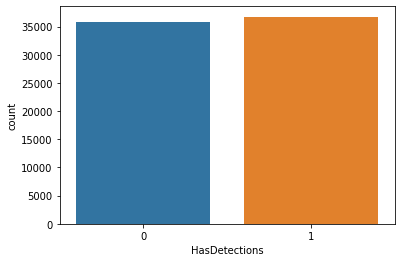

In [175]:
target_col = 'HasDetections'

sns.countplot(x = df[target_col])

In [176]:
df = df.drop(columns = ['MachineIdentifier','SMode','AvSigVersion','Processor','Census_OSVersion','Census_DeviceFamily','Census_OSArchitecture','OsVer','Census_InternalBatteryNumberOfCharges','Census_OSVersion'])

In [177]:
df.isna().sum().sum()

0

In [178]:
y = df[['HasDetections']]
X = df.drop(['HasDetections'], axis= 1)

In [179]:
categorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude="object").columns


In [180]:
def replace_missing_data(X, mis_vars):
    print('##### Replacing missing values with mode of features #####')
    for var in mis_vars:
        if var in categorical_features:
            X[var] = X[var].fillna(X[var].mode()[0])
        else:
            X[var] = X[var].fillna(X[var].mean())
    return X

In [181]:
mis_var = [var for var in X.columns if X[var].isnull().sum() > 0]
X = replace_missing_data(X, mis_var)

##### Replacing missing values with mode of features #####


In [182]:

one_hot_encoded_data = pd.get_dummies(X, columns = ['ProductName','EngineVersion', 'AppVersion', 'Platform','Census_GenuineStateName','Census_FlightRing', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_ActivationChannel'])

In [183]:
X.isnull().sum().sum()

0

In [184]:
X_train,X_test,y_train,y_test=train_test_split(one_hot_encoded_data,y,test_size=0.30,random_state=30)

In [185]:
X_train

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,ProductName_mse,ProductName_win8defender,EngineVersion_1.1.12805.0,EngineVersion_1.1.12902.0,EngineVersion_1.1.13000.0,EngineVersion_1.1.13103.0,EngineVersion_1.1.13202.0,EngineVersion_1.1.13303.0,EngineVersion_1.1.13407.0,EngineVersion_1.1.13504.0,EngineVersion_1.1.13601.0,EngineVersion_1.1.13701.0,EngineVersion_1.1.13704.0,EngineVersion_1.1.13804.0,EngineVersion_1.1.13903.0,EngineVersion_1.1.14003.0,EngineVersion_1.1.14104.0,EngineVersion_1.1.14202.0,EngineVersion_1.1.14305.0,EngineVersion_1.1.14306.0,EngineVersion_1.1.14405.2,EngineVersion_1.1.14500.5,EngineVersion_1.1.14600.4,EngineVersion_1.1.14700.3,EngineVersion_1.1.14700.4,EngineVersion_1.1.14700.5,EngineVersion_1.1.14800.1,EngineVersion_1.1.14800.3,EngineVersion_1.1.14901.3,EngineVersion_1.1.14901.4,EngineVersion_1.1.15000.1,EngineVersion_1.1.15000.2,EngineVersion_1.1.15100.1,EngineVersion_1.1.15200.1,EngineVersion_1.1.15300.5,EngineVersion_1.1.15300.6,AppVersion_4.10.14393.0,AppVersion_4.10.14393.1066,AppVersion_4.10.14393.1198,AppVersion_4.10.14393.1532,AppVersion_4.10.14393.1593,AppVersion_4.10.14393.1613,AppVersion_4.10.14393.1794,AppVersion_4.10.14393.2248,AppVersion_4.10.14393.2273,AppVersion_4.10.14393.953,AppVersion_4.10.209.0,AppVersion_4.11.15063.0,AppVersion_4.11.15063.1155,AppVersion_4.11.15063.447,AppVersion_4.12.16299.15,AppVersion_4.12.17007.17123,AppVersion_4.12.17007.18011,AppVersion_4.12.17007.18022,AppVersion_4.13.17134.1,AppVersion_4.13.17134.112,AppVersion_4.13.17134.191,AppVersion_4.13.17134.228,AppVersion_4.13.17134.319,AppVersion_4.14.17613.18038,AppVersion_4.14.17613.18039,AppVersion_4.14.17639.18041,AppVersion_4.15.17643.1000,AppVersion_4.16.17656.18051,AppVersion_4.16.17656.18052,AppVersion_4.17.17677.1000,AppVersion_4.17.17686.1003,AppVersion_4.18.1806.18062,AppVersion_4.18.1806.20015,AppVersion_4.18.1806.20021,AppVersion_4.18.1807.18072,AppVersion_4.18.1807.18075,AppVersion_4.18.1807.20063,AppVersion_4.18.1809.2,AppVersion_4.6.305.0,AppVersion_4.7.205.0,AppVersion_4.8.10240.16384,AppVersion_4.8.10240.17071,AppVersion_4.8.10240.17113,AppVersion_4.8.10240.17146,AppVersion_4.8.10240.17184,AppVersion_4.8.10240.17202,AppVersion_4.8.10240.17319,AppVersion_4.8.10240.17354,AppVersion_4.8.10240.17394,AppVersion_4.8.10240.17443,AppVersion_4.8.10240.17609,AppVersion_4.8.10240.17770,AppVersion_4.8.10240.17797,AppVersion_4.8.10240.17861,AppVersion_4.8.10240.17889,AppVersion_4.8.10240.17914,AppVersion_4.8.10240.17918,AppVersion_4.8.10240.17946,AppVersion_4.8.207.0,AppVersion_4.9.10586.0,AppVersion_4.9.10586.1045,AppVersion_4.9.10586.1106,AppVersion_4.9.10586.456,AppVersion_4.9.10586.494,AppVersion_4.9.10586.589,AppVersion_4.9.10586.672,AppVersion_4.9.10586.839,AppVersion_4.9.10586.873,AppVersion_4.9.10586.916,AppVersion_4.9.10586.962,AppVersion_4.9.10586.965,AppVersion_4.9.218.0,Platform_windows10,Platform_windows7,Platform_windows8,Census_GenuineStateName_INVALID_LICENSE,Census_Genuin

In [186]:
def evaluate_model(true, predicted):
    accuracy_score1 = accuracy_score(true, predicted)
    return accuracy_score1

In [187]:
models={
    'LogisticRegression':LogisticRegression(max_iter=1000),   
    'XGBClassifier':XGBClassifier()
}

trained_model_list=[]
model_list=[]
accuracy_score_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)
    #print(y_pred.shape)
    #print(y_test.shape)
    accuracy_score1=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("Accuracy score",accuracy_score1)

    accuracy_score_list.append(accuracy_score1)
    
    print('='*35)
    print('\n')

LogisticRegression
Accuracy score 0.5606840750275837


XGBClassifier
Accuracy score 0.6082659065833027


